**Objective**
* The aim of this study is to create a regression model that predicts a baseball player’s Salary on the basis of the dataset.

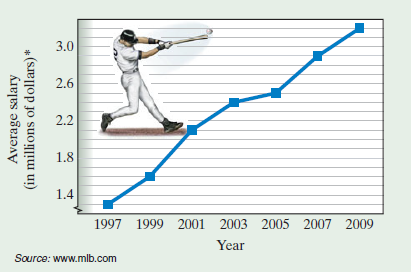
Source: https://www.chegg.com/

# 1. IMPORT SOME NECESSARY LIBRARIES

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

# Load Data

In [53]:
df=pd.read_csv("../input/hitters/Hitters.csv")

# 2. UNDERSTANDING THE DATA-SET

**The Dataset**
* The dataset was taken from the StatLib library. It was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The related  statistics were obtained from The 1987 Baseball Encyclopedia Update (Collier Books, Macmillan Publishing Company, New York).

The dataset consists of 322 samples about major league players. All of the variables in the dataset are listed below;

**Dependent Variable:**
* Salary: 1987 annual salary on opening day in thousands of dollars


**Independent Variable:**
1. AtBat: Number of times at bat in 1986 
1. Hits: Number of hits in 1986 
1. HmRun: Number of home runs in 1986 
1. Runs: Number of runs in 1986 
1. RBI: Number of runs batted in in 1986 
1. Walks: Number of walks in 1986 
1. Years: Number of years in the major leagues 
1. CAtBat: Number of times at bat during his career 
1. CHits: Number of hits during his career 
1. CHmRun: Number of home runs during his career 
1. CRuns: Number of runs during his career
1. CRBI: Number of runs batted in during his career 
1. CWalks: Number of walks during his career 
1. League: A factor with levels A and N indicating player’s league at the end of 1986 
1. Division: A factor with levels E and W indicating player’s division at the end of 1986 
1. NewLeague: A factor with levels A and N indicating player’s league at the beginning of 1987
1. PutOuts: Number of put outs in 1986 
1. Assists: Number of assists in 1986 
1. Errors: Number of errors in 1986

In [54]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [56]:
# The unique observation numbers in variables.
df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [57]:
# The dataset was examined. It consists of 322 observation units and 20 variables.
df.shape

(322, 20)

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [59]:
df.isnull().values.any()

True

In [60]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

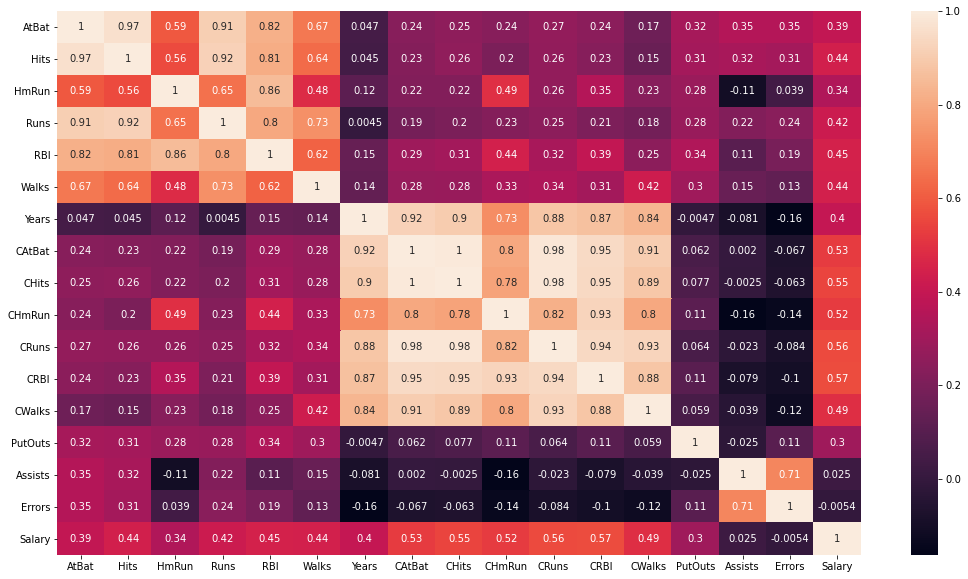

In [61]:
# Visualization
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

# 3. EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA

In [62]:
more_cat_cols = [col for col in df.columns if len(df[col].unique()) < 10]
print('Number of Categorical Variables : ', len(more_cat_cols))
print(more_cat_cols)

Number of Categorical Variables :  3
['League', 'Division', 'NewLeague']


As seen above, there are three categorical variables in the dataset.

In [63]:
# League: A factor with levels A and N indicating player’s league at the end of 1986 
df["League"].value_counts()

A    175
N    147
Name: League, dtype: int64

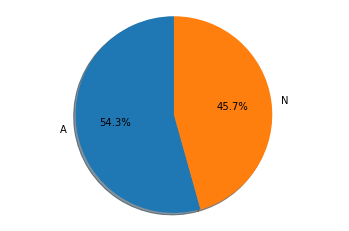

In [64]:
fig1, ax1 = plt.subplots()
ax1.pie(df["League"].value_counts(),labels=['A','N'],autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [65]:
#  A factor with levels A and N indicating player’s league at the beginning of 1987
df["NewLeague"].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

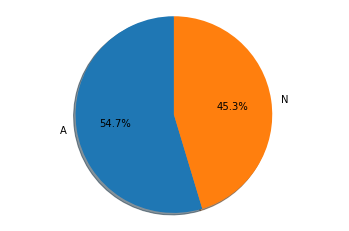

In [66]:
fig1, ax1 = plt.subplots()
ax1.pie(df["NewLeague"].value_counts(),labels=['A','N'],autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [67]:
# Division: A factor with levels E and W indicating player’s division at the end of 1986.
df["Division"].value_counts()

W    165
E    157
Name: Division, dtype: int64

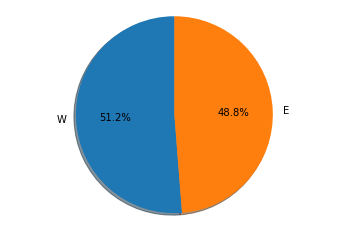

In [68]:
fig1, ax1 = plt.subplots()
ax1.pie(df["Division"].value_counts(),labels=['W','E'],autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# 4. ANALYSIS of NUMERICAL VARIABLE

In [69]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variables: ', len(num_cols))
num_cols

Number of Numerical Variables:  17


['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

**Visualization of numeric variables**

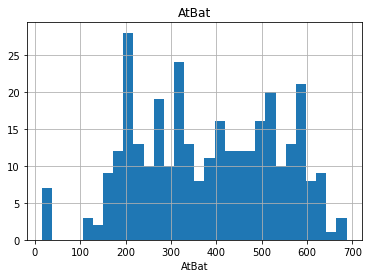

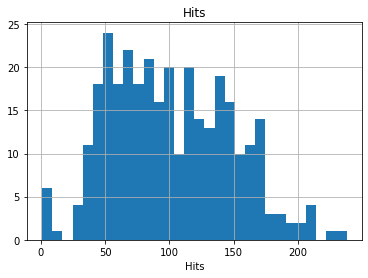

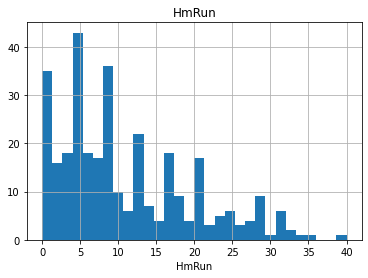

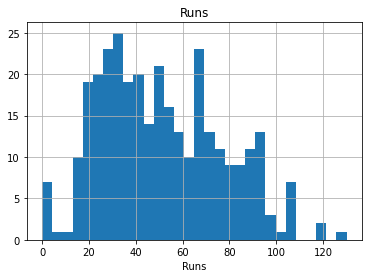

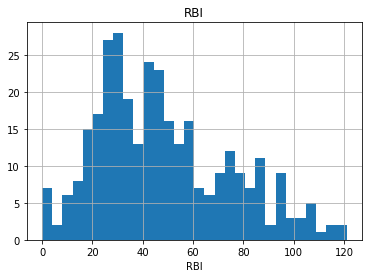

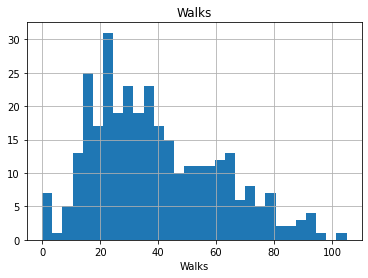

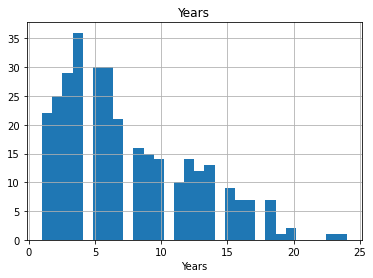

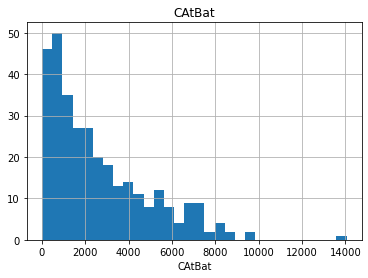

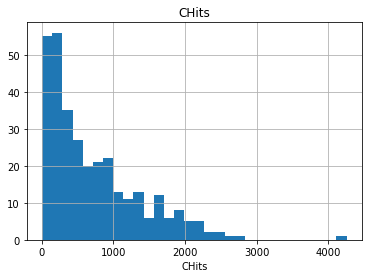

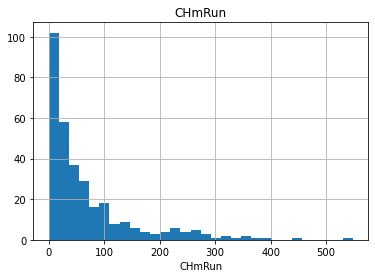

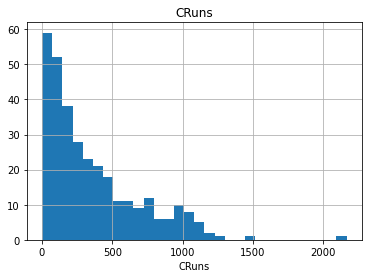

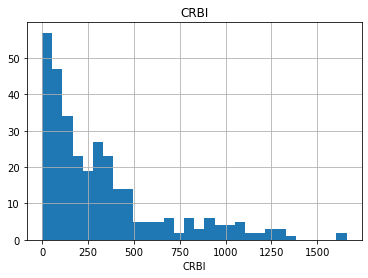

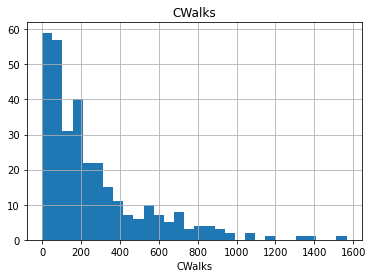

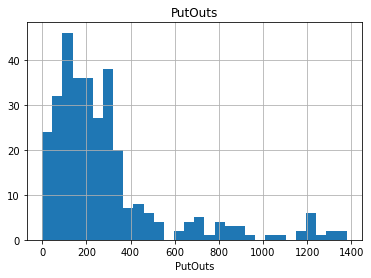

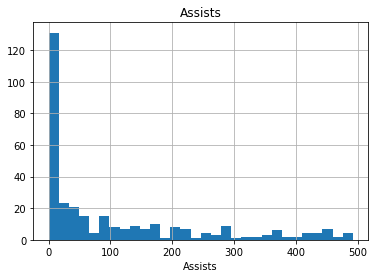

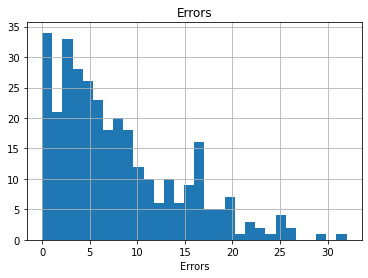

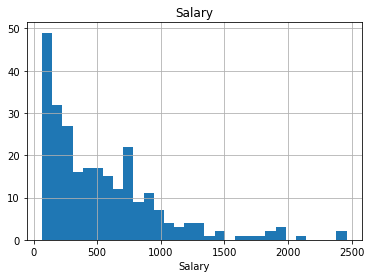

17 variables have been plotted


In [70]:
def hist_for_nums(data, num_cols):
    col_counter = 0
    data = data.copy()
    for col in num_cols:
        data[col].hist(bins=30)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")
hist_for_nums(df, num_cols)

# 5. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

In [71]:
df.Salary.describe().T

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

In [72]:
df['Salary'].median()

425.0

In [73]:
# The values of Skewness and Kurtosis indicate that there is no a normal distribution.
print("Skewness: %f" % df['Salary'].skew())
print("Kurtosis: %f" % df['Salary'].kurt())

Skewness: 1.588967
Kurtosis: 3.058965


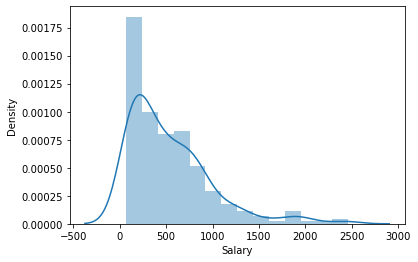

In [74]:
sns.distplot(df.Salary);

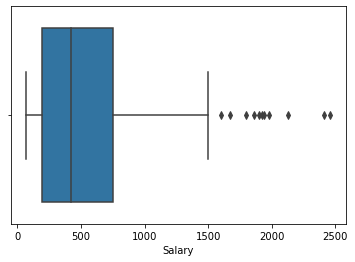

In [75]:
# Visualization of the Salary variable with the boxplot method. There are some outlier values observed on the graphic.
sns.boxplot(x = df["Salary"]);

In [76]:
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Salary"] > upper,"Salary"] = upper

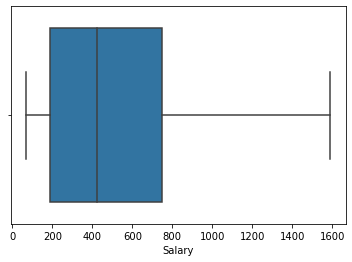

In [77]:
sns.boxplot(x = df["Salary"]);

In [78]:
df.Salary.describe().T

count     263.000000
mean      520.025259
std       400.909143
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      1590.000000
Name: Salary, dtype: float64

# Missing Values

In [79]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

For categorical columns (string columns), the missing values can be filled with mode. For numerical columns, the missing values can be filled with with mean.

In [80]:
# Replacing missing data with its mean
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

In [81]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

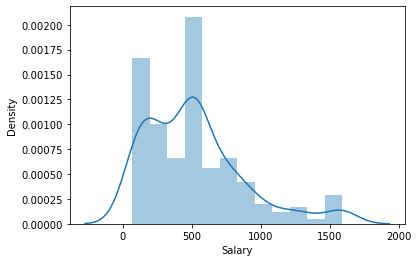

In [82]:
sns.distplot(df.Salary);

**LOG TRANSFORMATION**
* The distribution of the dependent variable (Salary) is not a normal. 
Log transformation is a good choose.

In [83]:
# # Applying the log1p function log(1+x) to Salary
df["Salary"] = np.log1p(df["Salary"])

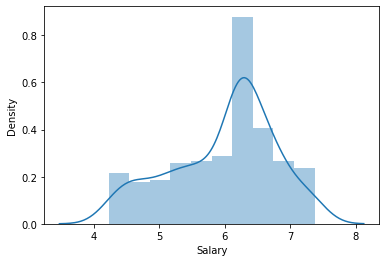

In [84]:
# Check the new distribution after log transformation
sns.distplot(df.Salary);

# 6. ONE-HOT ENCODING

In [85]:
# One hot encoding was applied to categorical variables (two or more).
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)

In [86]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,6.255799,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.165418,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.175867,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.216606,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.527209,1,0,1


# 7. MODELING

* I split the data set: 80% of the data is train, and 20% of it is test data.

In [87]:
y=df["Salary"]
X=df.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)

# Linear Regression

In [88]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred=reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6115269220621015

# Ridge Regression

In [89]:
ridge_model=Ridge().fit(X_train,y_train)
y_pred= ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6112932045102936

**Model Tuning and Final Model**

In [90]:
alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridge_tuned_rmse

0.6113935272643111

# Lasso Regression

In [91]:
lasso_model = Lasso().fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6285205402146133

**Model Tuning and Final Model**

In [92]:
alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lasso_tuned_rmse

0.6109841011459226

# Elastic Net Regression

In [93]:
enet_model = ElasticNet().fit(X_train, y_train)
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.624021756647631

**Model Tuning and Final Model**

In [94]:
enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}

enet_model = ElasticNet().fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_tuned_rmse

0.6155748888149851

In [95]:
# Evaluate each model
models = [('LinearRegression', LinearRegression()),
          ('Ridge', Ridge()),
          ('Lasso', Lasso()),
          ('ElasticNet', ElasticNet())]
results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

LinearRegression: 0.611527
Ridge: 0.611293
Lasso: 0.628521
ElasticNet: 0.624022


In [96]:
# Result of Final Models
result_df = pd.DataFrame({"RMSE":[np.sqrt(mean_squared_error(y_test, y_pred)), df_ridge_tuned_rmse, df_lasso_tuned_rmse, df_enet_tuned_rmse]})
result_df.index= ["LinearRegression", "Ridge","Lasso","ElasticNet"]
result_df                        

,RMSE
LinearRegression,0.624022
Ridge,0.611394
Lasso,0.610984
ElasticNet,0.615575


The root-mean-square error (RMSE) indicates a measure of the differences between actual values and predicted values observed. 
The lowest RMSE was obtained from Lasso Regression (0.6109841011459226)